In [1]:
df = pd.read_csv('./Excel-Python-DA/loan.csv',encoding='gbk')
df

<IPython.core.display.Javascript object>

,用户ID,好坏客户,年龄,负债率,月收入,家属数量
0,1,1,45,0.802982,9120.0,2.0
1,2,0,40,0.121876,2600.0,1.0
2,3,0,38,0.085113,3042.0,0.0
3,4,0,30,0.036050,3300.0,0.0
4,5,0,49,0.024926,63588.0,0.0
...,...,...,...,...,...,...
149995,149996,0,74,0.225131,2100.0,0.0
149996,149997,0,44,0.716562,5584.0,2.0
149997,149998,0,58,3870.000000,NaN,0.0
149998,149999,0,30,0.000000,5716.0,0.0


### 数据预处理

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   用户ID    150000 non-null  int64  
 1   好坏客户    150000 non-null  int64  
 2   年龄      150000 non-null  int64  
 3   负债率     150000 non-null  float64
 4   月收入     120269 non-null  float64
 5   家属数量    146076 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [3]:
df = df.fillna({'月收入':df['月收入'].mean()})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   用户ID    150000 non-null  int64  
 1   好坏客户    150000 non-null  int64  
 2   年龄      150000 non-null  int64  
 3   负债率     150000 non-null  float64
 4   月收入     150000 non-null  float64
 5   家属数量    146076 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


### 坏账率与收入

In [22]:
cut_bins = [0,5000,10000,15000,20000,100000]

income_cut = pd.cut(df.月收入,cut_bins)

# income_cut

Total = df['好坏客户'].groupby(income_cut).count()

Bad = df['好坏客户'].groupby(income_cut).sum()

Bad_Rate = Bad/Total

Bad_Rate

<IPython.core.display.Javascript object>

月收入
(0, 5000]          0.087543
(5000, 10000]      0.058308
(10000, 15000]     0.041964
(15000, 20000]     0.041811
(20000, 100000]    0.053615
Name: 好坏客户, dtype: float64

Text(0.5, 1.0, '坏账率与收入')

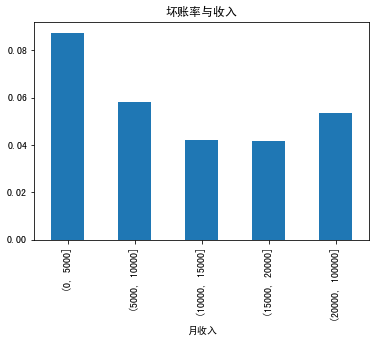

In [17]:
Bad_Rate.plot.bar()
plt.title('坏账率与收入')

### 坏账率与年龄

<IPython.core.display.Javascript object>

Text(0.5, 1.0, '坏账率与年龄')

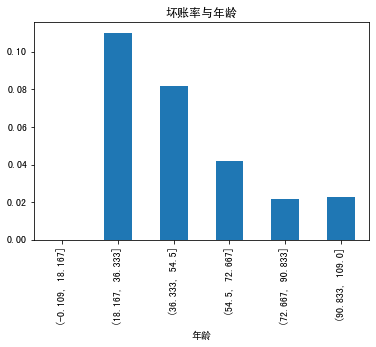

In [25]:
age_cut = pd.cut(df.年龄,6)

TOTAL = df['好坏客户'].groupby(age_cut).count()
BAD = df['好坏客户'].groupby(age_cut).sum()
Bad_rate = BAD/TOTAL
Bad_rate.plot.bar()
plt.title('坏账率与年龄')

### 坏账率与家属数量

虽然人口数量也是连续值,但是因为数值不是很大,所以我们就当作离散值处理,不进行区间切分。

Text(0.5, 1.0, '坏账率与家属数量')

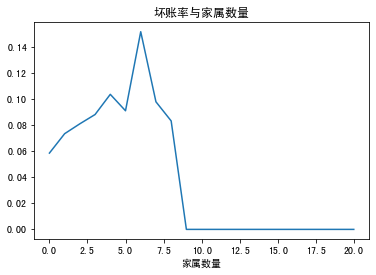

In [31]:
TOTAL = df['好坏客户'].groupby(df.家属数量).count()
BAD = df['好坏客户'].groupby(df.家属数量).sum()
Bad_rate = BAD/TOTAL
Bad_rate.plot()
plt.title('坏账率与家属数量')